# Pymaceuticals Inc.
---

### Analysis


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharma_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
pharma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice.
mice = pharma_df.groupby('Mouse ID')['Mouse ID'].nunique()
mice.count()

249

In [26]:
pd.set_option('display.max_rows', None)
pharma_df.sort_index()
pharma_df.set_index('Mouse ID')

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
k403,Ramicane,Male,21,16,25,33.464577,1
k403,Ramicane,Male,21,16,30,31.099498,1
k403,Ramicane,Male,21,16,35,26.546993,1
k403,Ramicane,Male,21,16,40,24.365505,1


In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = pharma_df.loc[pharma_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicates=pd.DataFrame(duplicates)
all_duplicates


,0
0,g989


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanpharma_df = cleanpharma_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
cleanpharma_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [32]:
# Checking the number of mice in the clean DataFrame.
cleanmice = pharma_df.groupby('Mouse ID')['Mouse ID'].nunique()
cleanmice.count()


249

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = cleanpharma_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_mean
drug_median = cleanpharma_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_median
drug_variance = cleanpharma_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_variance
drug_std = cleanpharma_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_std
drug_sem = cleanpharma_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
drug_sem

# Assemble the resulting series into a single summary dataframe.

summary = pd.DataFrame({"Mean Tumor Volume": drug_mean, "Median Tumor Volume":drug_median, "Tumor Volume Variance":drug_variance, "Tumor Volume Std. Dev.": drug_std, "Tumor Volume Std. Err.": drug_sem})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
groupby = cleanpharma_df.groupby('Drug Regimen')
summary2 = groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

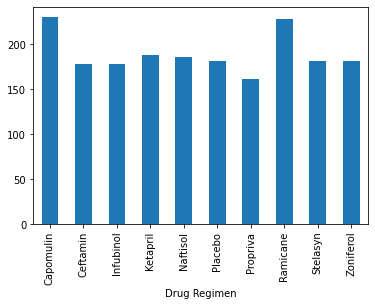

In [50]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_count = pharma_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


ax = mice_count.plot.bar(x='Drug Regimen', y='Mouse ID', rot=90)

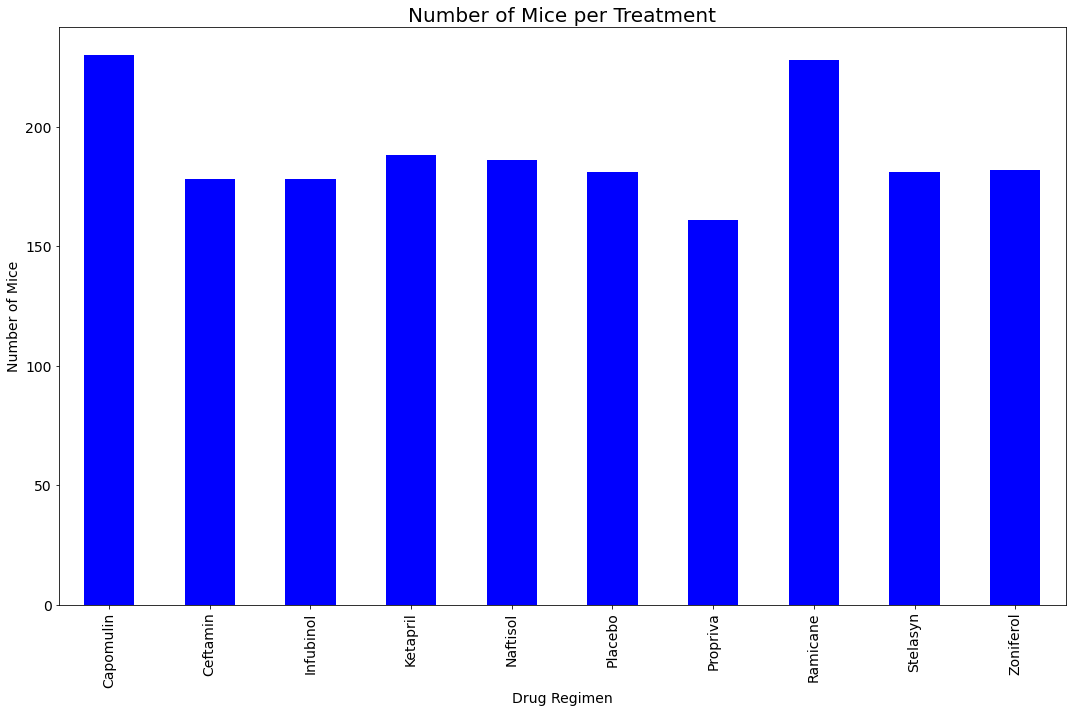

In [51]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

plot_pandas = mice_count.plot.bar(figsize=(15,10), color='b',fontsize = 14)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.savefig("../Images/mice_count.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()


In [70]:
gender_group = pharma_df.groupby(["Mouse ID","Sex"])
gender_group

gender_df = pd.DataFrame(gender_group.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


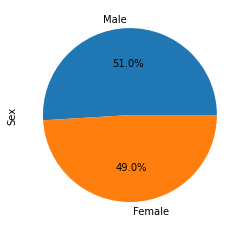

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot = mouse_gender.plot.pie(y='Percentage of Sex',autopct="%.2f", figsize=(5, 5))



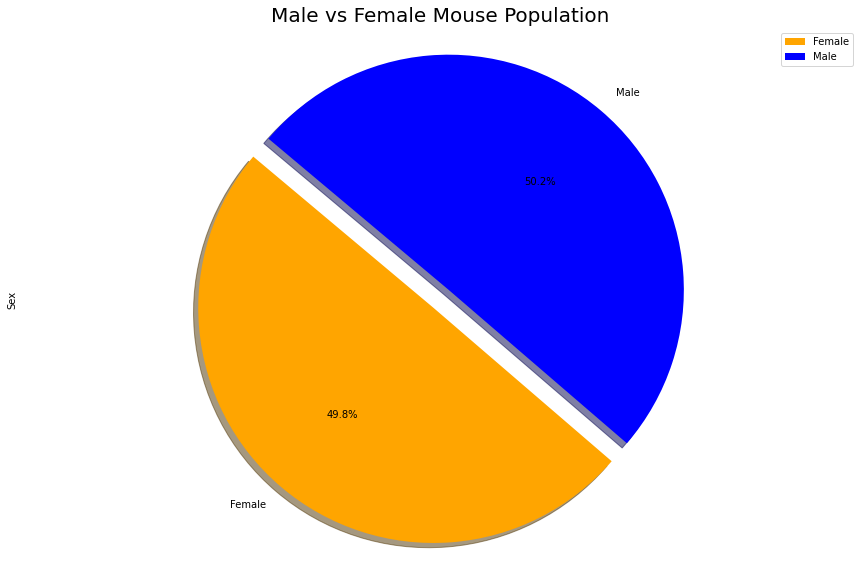

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['orange', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex')
plt.axis("equal")

plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [84]:
last_time_point = pharma_df.groupby('Mouse ID').max()['Timepoint']
tumor_volume = pd.merge(last_time_point, pharma_df, on=("Mouse ID","Timepoint"),how="left")
tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_point = pharma_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_time_point, pharma_df, on=("Mouse ID","Timepoint"),how="left")
tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for drug in regimen:
    
    drug_tumor_volume = tumor_volume[tumor_volume['Drug Regimen'] == drug]  
    drug_tumor_volume = tumor_volume['Tumor Volume (mm3)']

# Create empty list to fill with tumor vol data (for plotting)

    quartiles = drug_tumor_volume.quantile([.25, .5, .75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    
    iqr = q3 - q1
    iqr_1_5 = iqr * 1.5

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    q1_bound = q1 - iqr_1_5
    q3_bound = q3 + iqr_1_5
    outliers = [q1_bound, q3_bound]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    potential_outliers = []
    for value in drug_tumor_volume:
        if value < q1_bound or value > q3_bound:
            potential_outliers.append(value)
    
    # Determine outliers using upper and lower bounds

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


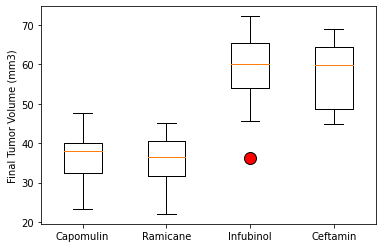

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='x', markerfacecolor='red')
tumor_volume.boxplot(column=['Tumor Volume (mm3)'], by='Drug Regimen', flierprops=flierprops)
plt.title('')
plt.ylabel('Tumor Volume (mm3)') 
plt.xticks(rotation=90)
plt.show()

## Line and Scatter Plots

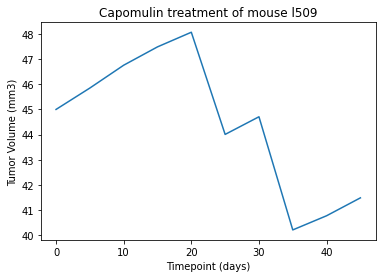

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treated_mouses = pharma_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
treated_mouses = treated_mouses[treated_mouses['Drug Regimen'] == 'Capomulin']
treated_mice = treated_mouses[treated_mouses['Mouse ID'] == 'l509']

plt.plot(treated_mice['Timepoint'], treated_mice['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mice l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volum (mm3)')


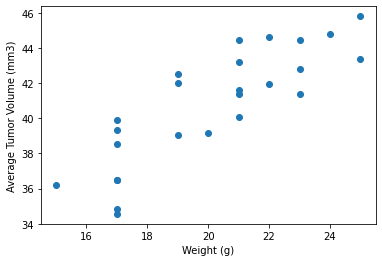

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_weight = summary_df[['Mouse ID', 'Weight (g)']]
treated_mouses = treated_mouses.merge(mouse_weight, on='Mouse ID')

avg_tumor_volume = treated_mouses.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
treated_mouses['Weight (g)']
weight = treated_mouses.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(weight, avg_tumor_volume)
plt.title('Mouse Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694722


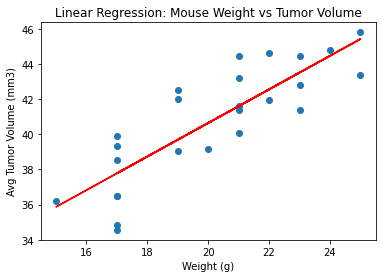

In [120]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, avg_tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume is {correlation[0]}')
mt_slope, mt_int, mt_r, mt_p, mt_std_err = st.linregress(weight,avg_tumor_volume)
mt_fit = mt_slope * weight + mt_int

plt.scatter(weight,avg_tumor_volume)
plt.plot(weight,mt_fit,"-", color='red')
plt.title('Linear Regression: Mouse Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()
plt.show()